In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/Walmart.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


first EDA


Text(0.5, 1.0, 'Distribution of Weekly Sales')

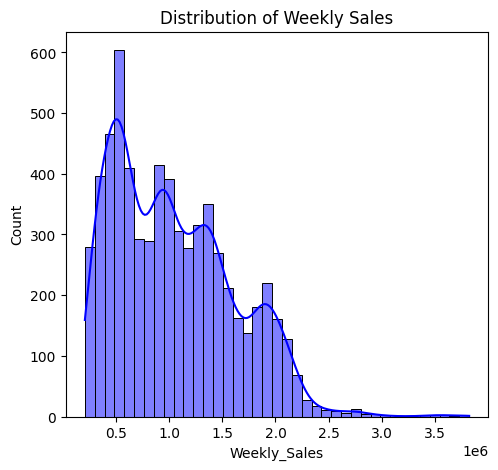

In [4]:
plt.figure(figsize=(12, 5))

# Histogram to see the shape of sales
plt.subplot(1, 2, 1)
sns.histplot(df['Weekly_Sales'], kde=True, color='blue')
plt.title('Distribution of Weekly Sales')

The Data is "Right-Skewed":Simple Linear Regression assumes a symmetrical (Normal) distribution. Because the data is skewed, your model might struggle to predict those high-value weeks accurately unless we use a more robust model (like Random Forest) or transform the target (e.g., using a Log scale).

We Have "Multimodality" (The Triple Hump):This suggests that your data is actually made up of different groups of stores or time periods.

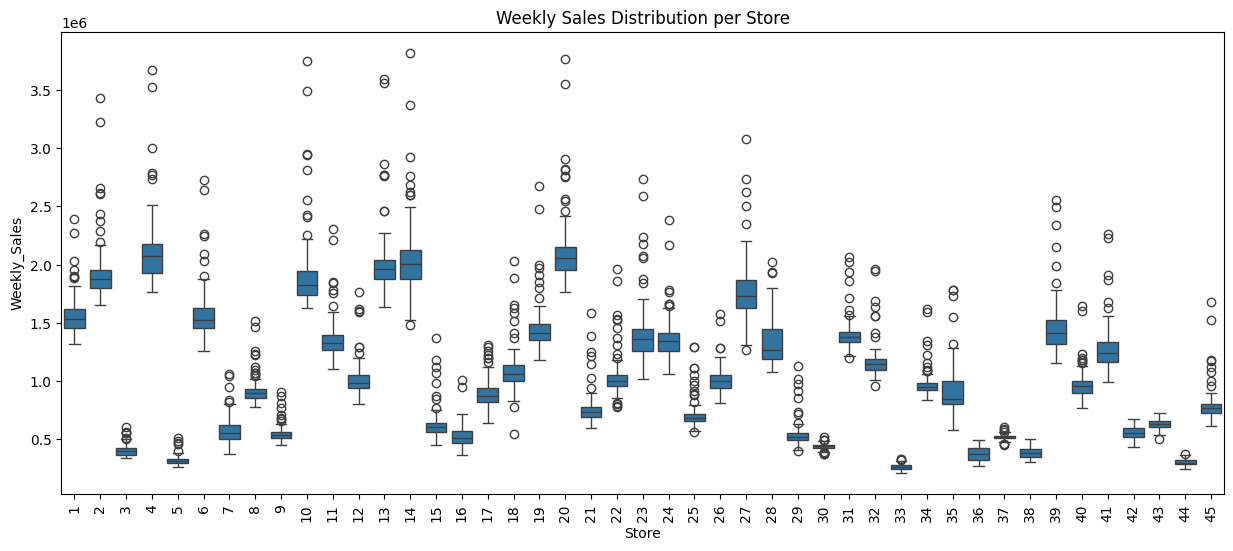

In [5]:
plt.figure(figsize=(15, 6))
# This creates a boxplot for every store in the dataset
sns.boxplot(data=df, x='Store', y='Weekly_Sales')
plt.title('Weekly Sales Distribution per Store')
plt.xticks(rotation=90) # Rotate store numbers so they don't overlap
plt.show()

some stores whose boxes are all stuck down at $0.5M, while others have boxes centered at $1.5M. This proves the "First Peak" is Store A, and the "Second Peak" is Store B.

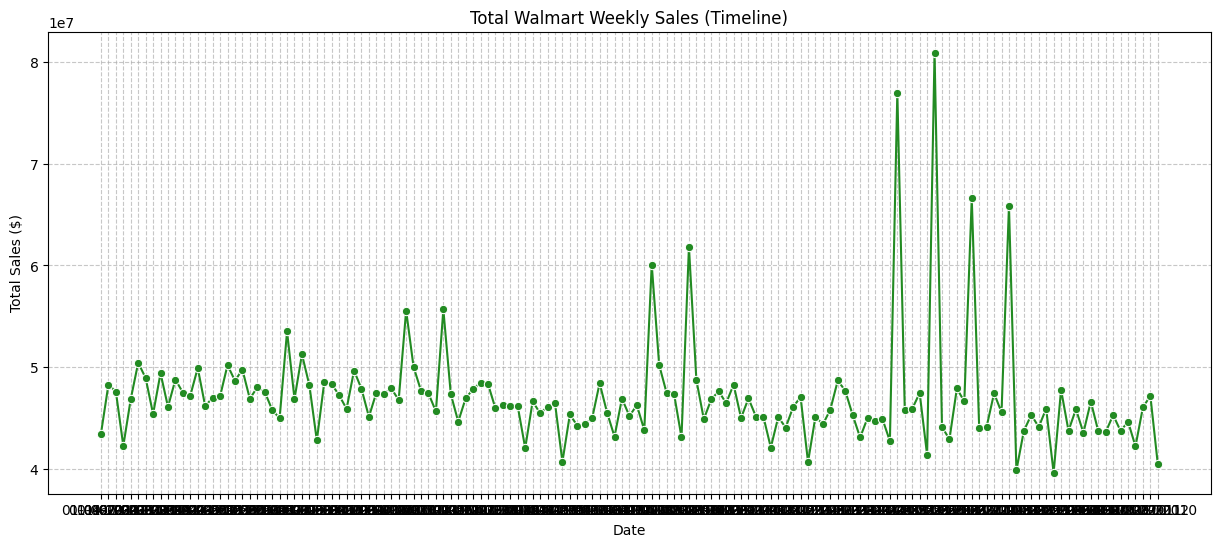

In [6]:
# 2. Group by Date to see the 'big picture' of Walmart's revenue
timeline = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# 3. Plot the line chart
plt.figure(figsize=(15, 6))
sns.lineplot(data=timeline, x='Date', y='Weekly_Sales', color='forestgreen', marker='o')

# Adding vertical lines for known holidays to see if they match the spikes
plt.title('Total Walmart Weekly Sales (Timeline)')
plt.ylabel('Total Sales ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

we are investigating why sales go up or down. Your data shows that time (holidays) is the biggest driver, but now we need to see if the economy (CPI and Unemployment) actually matters.

See those tall "mountain peaks"? They only happen once a year in December.

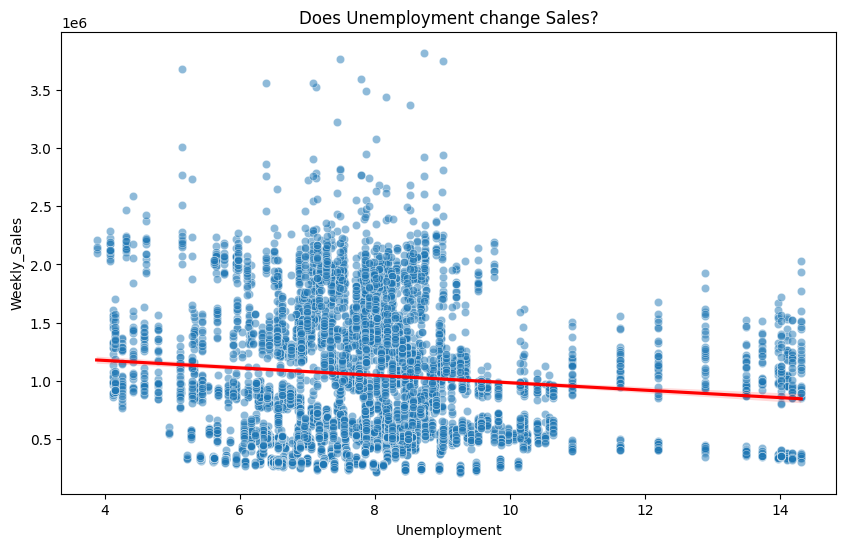

In [7]:
plt.figure(figsize=(10, 6))
# This draws every week as a dot
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', alpha=0.5)

# This draws a "Trend Line" to show us the general direction
sns.regplot(data=df, x='Unemployment', y='Weekly_Sales', scatter=False, color='red')

plt.title('Does Unemployment change Sales?')
plt.show()

The Trend: As the Unemployment rate (the bottom axis) moves from left to right (increasing), the Weekly_Sales (the vertical axis) generally move down.

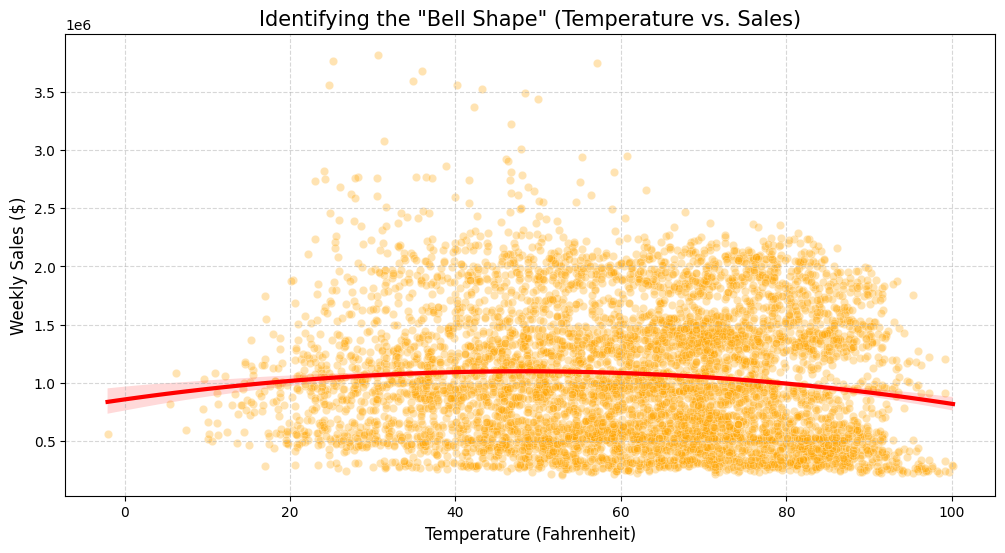

In [9]:
# Set the figure size
plt.figure(figsize=(12, 6))

# 1. Create the scatter plot (the dots)
# We use 'alpha=0.3' to make dots transparent so we can see where they overlap
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', color='orange', alpha=0.3)

# 2. Add the "Bell Curve" Trend Line
# 'order=2' tells the computer to draw a curved line (parabola) instead of a straight one
sns.regplot(data=df, x='Temperature', y='Weekly_Sales',
            scatter=False, order=2, color='red', line_kws={"linewidth": 3})

# 3. Label the graph
plt.title('Identifying the "Bell Shape" (Temperature vs. Sales)', fontsize=15)
plt.xlabel('Temperature (Fahrenheit)', fontsize=12)
plt.ylabel('Weekly Sales ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

It isn't a perfect, symmetrical bell (like a church bell), but it follows the "bell logic".
Why this matters for your Machine Learning Model?
Linear Regression will struggle: A straight line would cut through the middle and miss the fact that sales drop at both ends.

Tree Models (Random Forest) will succeed: These models can "slice" the temperature. They will learn: "If temp < 20, predict low. If temp is 40-70, predict high. If temp > 90, predict low".

/tmp/ipython-input-3108396155.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Holiday_Flag', y='Weekly_Sales', palette='Set2')


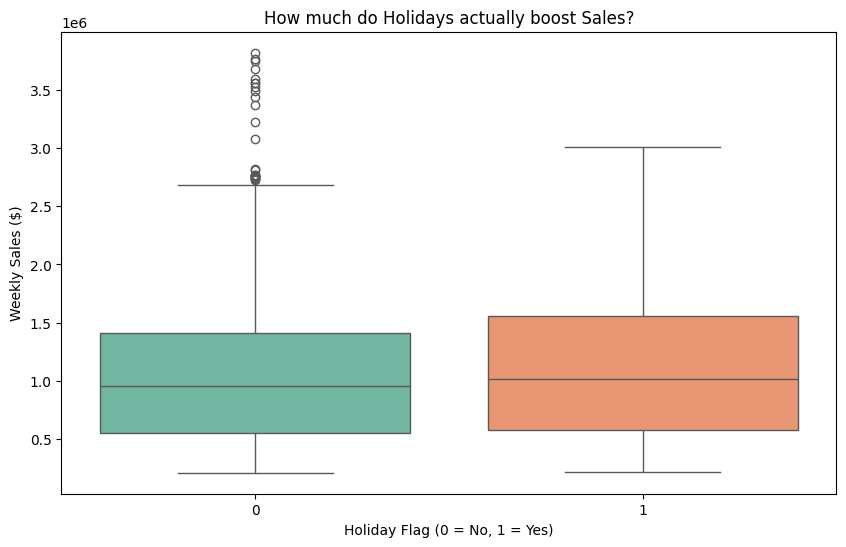

In [14]:
plt.figure(figsize=(10, 6))
# This compares the distribution of sales for 0 (Normal) and 1 (Holiday)
sns.boxplot(data=df, x='Holiday_Flag', y='Weekly_Sales', palette='Set2')

plt.title('How much do Holidays actually boost Sales?')
plt.xlabel('Holiday Flag (0 = No, 1 = Yes)')
plt.ylabel('Weekly Sales ($)')
plt.show()

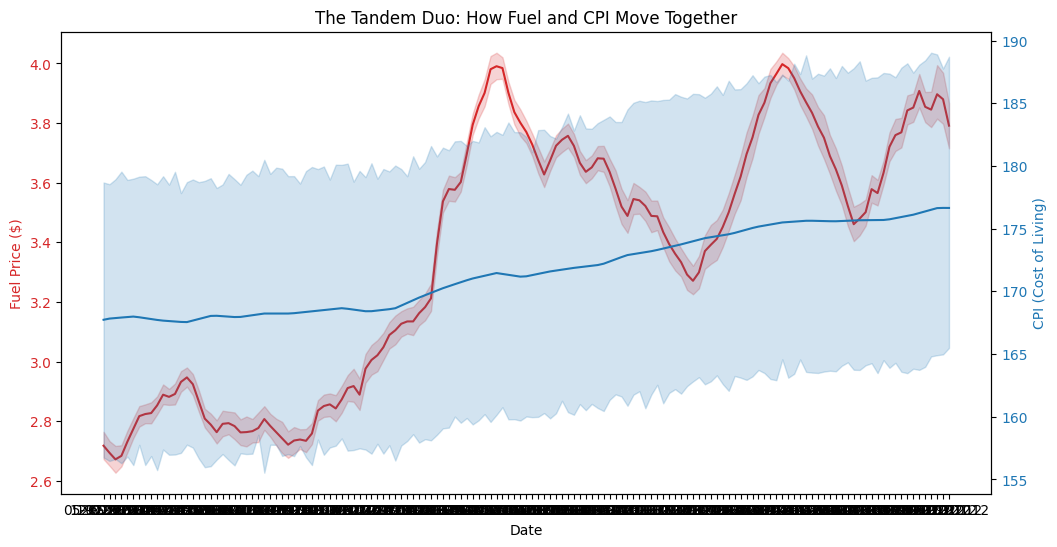

In [16]:


# Create the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# 1. Plot Fuel Price (Left Axis)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Fuel Price ($)', color=color)
sns.lineplot(data=df, x='Date', y='Fuel_Price', ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 2. Create a second axis for CPI (Right Axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CPI (Cost of Living)', color=color)
sns.lineplot(data=df, x='Date', y='CPI', ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('The Tandem Duo: How Fuel and CPI Move Together')
plt.show()

The graph reveals a strong positive correlation between Fuel Price and CPI (Consumer Price Index), acting as a "Tandem Duo" that defines the store's economic environment.


Because you have a mix of different relationship types—some linear (CPI/Fuel), some sudden (Holidays), and some curved (Temperature)—the best model to use is a Random Forest Regressor.

Use Random Forest if you want a stable, quick result that is easy to explain. It’s perfect for a first-time analysis.

Use XGBoost if you want to win a competition or get the absolute highest accuracy possible.

Pro-Tip: In the industry, we usually try both. We run a Random Forest to get a "baseline" score, and then we try XGBoost to see if we can beat that score by a few percentage points.

both models will perform much better than Linear Regression. However, XGBoost is currently the industry standard for retail forecasting because it is so good at catching tiny patterns in the data.

***Even though Random Forest and XGBoost are "smart" models, they still need the data to be cleaned and formatted properly to reach their full potential.***

In [17]:
# Convert to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)

# Now we drop the original Date column because it's not a number
df.drop('Date', axis=1, inplace=True)

In [18]:

# This will turn the 'Store' column into 45 separate columns
df_encoded = pd.get_dummies(df, columns=['Store'], prefix='Store')

# Show the first few columns to see the change
print(df_encoded.head())

   Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0    1643690.90             0        42.31       2.572  211.096358   
1    1641957.44             1        38.51       2.548  211.242170   
2    1611968.17             0        39.93       2.514  211.289143   
3    1409727.59             0        46.63       2.561  211.319643   
4    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  Year  Month  Week  Store_1  ...  Store_36  Store_37  \
0         8.106  2010      2     5     True  ...     False     False   
1         8.106  2010      2     6     True  ...     False     False   
2         8.106  2010      2     7     True  ...     False     False   
3         8.106  2010      2     8     True  ...     False     False   
4         8.106  2010      3     9     True  ...     False     False   

   Store_38  Store_39  Store_40  Store_41  Store_42  Store_43  Store_44  \
0     False     False     False     False     False     False     False

45 columns is very small! Modern models like Random Forest and XGBoost are designed to handle hundreds or even thousands of columns without breaking a sweat.

In [19]:
from sklearn.preprocessing import StandardScaler

# 1. Scaling the Numeric Columns
scaler = StandardScaler()
numeric_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 2. Final check of our features
X = df.drop('Weekly_Sales', axis=1) # Everything except the answer
y = df['Weekly_Sales']             # The answer

print("Rest of the columns scaled and ready!")

Rest of the columns scaled and ready!


In [20]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training rows: {X_train.shape[0]}")
print(f"Testing rows: {X_test.shape[0]}")

Training rows: 5148
Testing rows: 1287


In [21]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# --- Model 1: Random Forest ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# --- Model 2: XGBoost ---
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# --- Results ---
print(f"Random Forest R2 Score: {r2_score(y_test, rf_preds):.4f}")
print(f"XGBoost R2 Score: {r2_score(y_test, xgb_preds):.4f}")

Random Forest R2 Score: 0.9597
XGBoost R2 Score: 0.9735
